In [1]:
from first_functions import *

In [2]:
### obtain dataset

directory_stations_2020 = "C:\\Users\\renan\\OneDrive\\Documentos\\GitHub\\Consume_and_Weather_dissertação\\dados_metereo_rj\\raw\\2020_rj"

os.chdir(directory_stations_2020)

In [ ]:
# filepath_2023 = "C:\\Users\\renan\\Downloads\\2023.zip"

# #usando a função de compilar os datasets da base.

# df_stations_2023 = read_zipfile(filepath_2023)

  0%|          | 0/567 [00:00<?, ?it/s]

100%|██████████| 567/567 [03:13<00:00,  2.92it/s]


In [ ]:
# os.chdir(directory_stations_2020)

# df_stations_2023.to_csv('df_stations_down.csv', index= False)

In [3]:
os.chdir(directory_stations_2020)


In [4]:
df_stations_2023 = pd.read_csv('df_stations_down.csv')

In [5]:
df_stations_2023.columns

Index(['data', 'hora', 'precipitacao', 'pressao_atmosferica',
       'pressao_atmosferica_maxima', 'pressao_atmosferica_minima', 'radiacao',
       'temperatura_ar', 'temperatura_orvalho', 'temperatura_maxima',
       'temperatura_minima', 'temperatura_orvalho_maxima',
       'temperatura_orvalho_minima', 'umidade_relativa_maxima',
       'umidade_relativa_minima', 'umidade_relativa', 'vento_direcao',
       'vento_rajada', 'vento_velocidade', 'ano', 'mes', 'dia', 'regiao', 'uf',
       'estacao', 'codigo_wmo', 'latitude', 'longitude', 'altitude',
       'data_fundacao'],
      dtype='object')

In [6]:
### necessário tratar missing values
"TRANSFORMAÇÃO DA BASE"

df_stations = tratando_missing_values(df_stations_2023)


#caso o usuário da biblioteca queira testar o efeito de algum outro dataset com variável nox é no mínimo necessário que
#os timesteps de ambas as bases estejam iguais para o possível join.

"função para transformação do timestep em data e hora e junção das bases nox"

# df_stations_nox = join_databases(df_stations, databasenox)

c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:390: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Preenche os valores ausentes com a média


'função para transformação do timestep em data e hora e junção das bases nox'

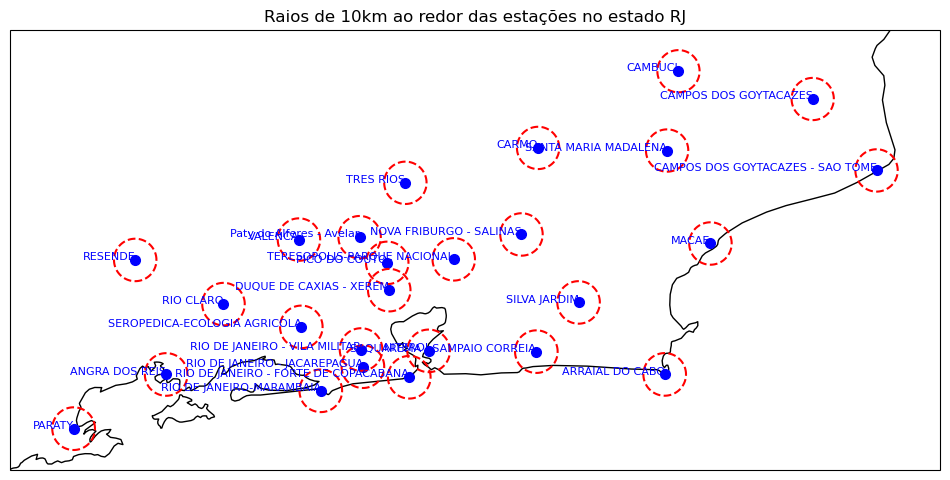

In [7]:
# plotando estações com raios de  10km.

plot_estacoes_com_raios(df_stations,'RJ')

In [8]:
"vamos filtrar só para o rj para facilitar os calculos"

df_stations = df_stations[df_stations_2023['uf'] == "RJ"]

In [9]:
df_stations.columns

Index(['data', 'hora', 'precipitacao', 'pressao_atmosferica',
       'pressao_atmosferica_maxima', 'pressao_atmosferica_minima', 'radiacao',
       'temperatura_ar', 'temperatura_orvalho', 'temperatura_maxima',
       'temperatura_minima', 'temperatura_orvalho_maxima',
       'temperatura_orvalho_minima', 'umidade_relativa_maxima',
       'umidade_relativa_minima', 'umidade_relativa', 'vento_direcao',
       'vento_rajada', 'vento_velocidade', 'ano', 'mes', 'dia', 'regiao', 'uf',
       'estacao', 'codigo_wmo', 'latitude', 'longitude', 'altitude',
       'data_fundacao'],
      dtype='object')

In [10]:
models = {
    'Linear Regression': LinearRegression,
    'Random Forest': RandomForestRegressor,
    'Gradient Boosting': GradientBoostingRegressor,
    'Support Vector Machine': SVR,
    'K-Nearest Neighbors': KNeighborsRegressor
    # 'ARIMA': ARIMAModel
}

# Supondo que você tenha um DataFrame `data` com suas features e target
numeric_features = ['temperatura_orvalho','temperatura_ar', 'umidade_relativa']
categorical_features = ['codigo_wmo']
target = 'precipitacao'


In [11]:
# Amostrar 10% dos dados
sampled_data = df_stations.sample(frac=0.1, random_state=42)


In [12]:
metrics_df = train_and_evaluate_models(models, sampled_data, numeric_features, categorical_features, target)


c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:499: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)


In [9]:
metrics_df_arima = train_and_evaluate_models(models, sampled_data, numeric_features, categorical_features, target)

c:\Users\renan\anaconda3\envs\inf2102\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\renan\anaconda3\envs\inf2102\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\renan\anaconda3\envs\inf2102\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\renan\anaconda3\envs\inf2102\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\renan\anaconda3\envs\inf2102\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(

                    Model       MAE       MSE      RMSE          MAPE
0       Linear Regression  0.304395  1.688725  1.299509  7.318003e+14
1           Random Forest  0.293379  2.078356  1.441650  6.271003e+14
2       Gradient Boosting  0.276455  1.689425  1.299779  6.075431e+14
3  Support Vector Machine  0.238792  1.707847  1.306846  3.989719e+14
4     K-Nearest Neighbors  0.283353  1.966178  1.402205  5.812832e+14


c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:507: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAPE', data=metrics_df, palette='viridis')


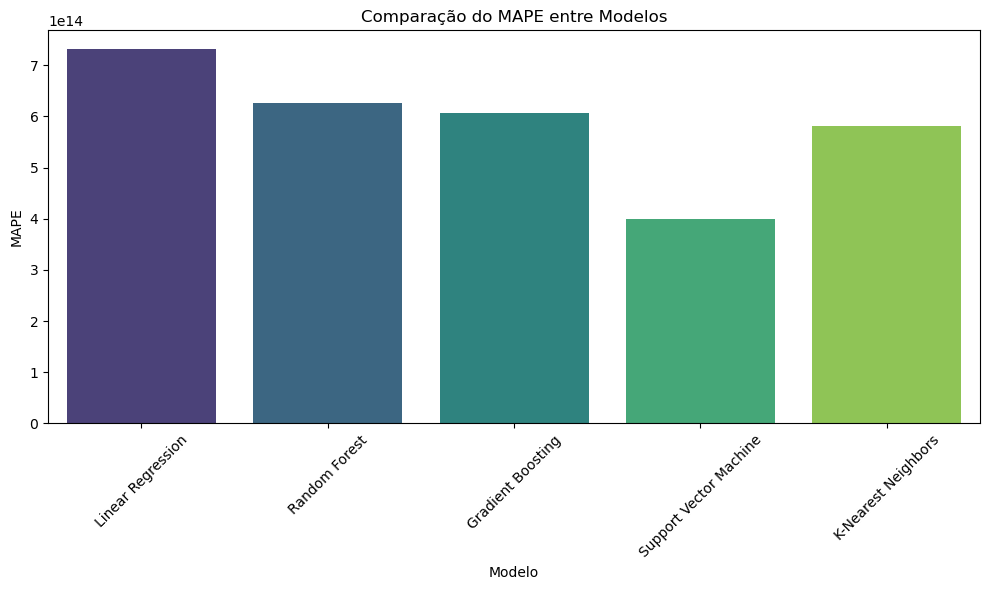

In [13]:
print(metrics_df)
plot_mape_comparison(metrics_df)

In [14]:
print(metrics_df_arima)
plot_mape_comparison(metrics_df_arima)

NameError: name 'metrics_df_arima' is not defined

In [19]:
# Escolher o melhor modelo

best_model_name, best_model_row = choose_best_model(metrics_df, metric='MAE')
best_model_class = models[best_model_name]

print(best_model_class)

print(f"O melhor modelo é: {best_model_name} com MAE: {best_model_row['MAE']}")
print(best_model_class)

best_model_stations = pipeline_generator(models[best_model_name](), numeric_features, categorical_features)

print(best_model_stations)

<class 'sklearn.svm._classes.SVR'>
O melhor modelo é: Support Vector Machine com MAE: 0.2387923734757985
<class 'sklearn.svm._classes.SVR'>
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temperatura_orvalho',
                                                   'temperatura_ar',
                                                   'umidade_relativa']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['codigo_wmo'])])),
                ('model', SVR())])


C:\Users\renan\AppData\Local\Temp\ipykernel_336\3181756150.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['y_'] = model.predict(subset_data[numeric_features + categorical_features])
C:\Users\renan\AppData\Local\Temp\ipykernel_336\3181756150.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['y_'] = model.predict(subset_data[numeric_features + categorical_features])
C:\Users\renan\AppData\Local\Temp\ipykernel_336\3181756150.py:10: SettingWithCopyWarning: 
A value is trying to 

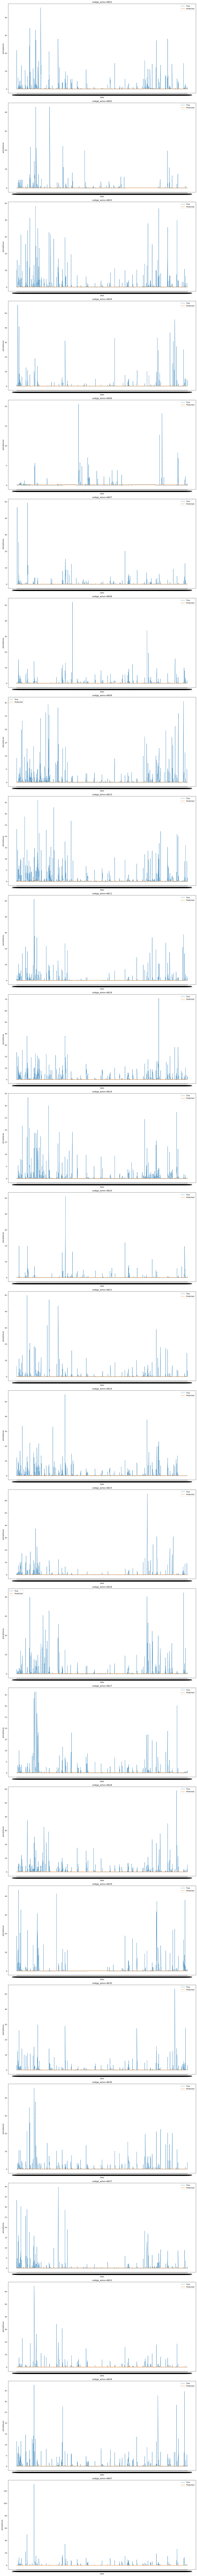

In [31]:
plot_target_by_break_variable(df_stations, best_model_stations, numeric_features, categorical_features, target='precipitacao', break_variable='codigo_wmo')